<a href="https://colab.research.google.com/github/IgorRamos099/salary-data-analysis/blob/main/analise_salarial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando o arquivo e realizando a primeira leitura**

In [4]:
df = pd.read_csv('/mnt/salario_profissionais_dados.csv')


In [5]:
df.head()

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


**Verificando a quantidade de linhas e colunas, tipos de váriaveis e se possuem valores ausente**

In [6]:
# Quantidade de linhas e colunas
df.shape


(3755, 10)

In [7]:
# DDL da tabela, informando os nomes e tipos de datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


In [8]:
# Verificando se possuem valores ausentes, em "branco"
df.isnull().sum()

,0
work_year,0
country,0
region,0
experience_level,0
job_title,0
salary_in_usd,0
employee_residence,0
company_location,0
company_size,0
years_of_experience,0


**Descobrindo quais são os cargos mais comuns, quais niveis de experiência são mais comuns e qual empresa mais predomina no mercado**

In [11]:
# Cargo

df['job_title'].value_counts().head(10)

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
Data Architect,101
Research Scientist,82
Applied Scientist,58
Data Science Manager,58


In [12]:
# Nível de experiência

df['experience_level'].value_counts()

,count
experience_level,
SE,2516
MI,805
EN,320
EX,114


In [16]:
# Tamanho da empresa

df['company_size'].value_counts()

,count
company_size,
M,3153
L,454
S,148


**Analisando a variável principal e extraindo alguns dados**

In [19]:
df['salary_in_usd'].describe()

,salary_in_usd
count,3755.000000
mean,137570.389880
std,63055.625278
min,5132.000000
25%,95000.000000
50%,135000.000000
75%,175000.000000
max,450000.000000


In [36]:
# Média por nivel de experiência

df.groupby('experience_level')['salary_in_usd'].mean()



,salary_in_usd
experience_level,
EN,78546.284375
EX,194930.929825
MI,104525.939130
SE,153051.071542


In [37]:
# Mediana por nivel de experiência

df.groupby('experience_level')['salary_in_usd'].median()


,salary_in_usd
experience_level,
EN,70000.0
EX,196000.0
MI,100000.0
SE,146000.0


In [34]:
# Estatísticas descritivas
desc_stats = df['salary_in_usd'].describe()
print(desc_stats)

# Calculando Mediana
median_salary = df['salary_in_usd'].median()
print("Mediana:", median_salary)

# Calculando Desvio padrão
std_salary = df['salary_in_usd'].std()
print("Desvio Padrão:", std_salary)


count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
Mediana: 135000.0
Desvio Padrão: 63055.625278224084


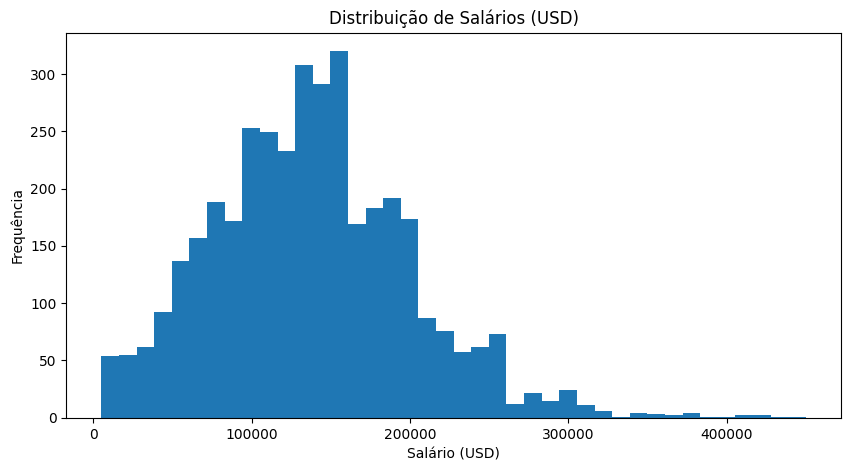

In [38]:
# Criando o gráfico de distribuição de salários

plt.figure(figsize=(10,5))
plt.hist(df['salary_in_usd'], bins=40)
plt.title("Distribuição de Salários (USD)")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()


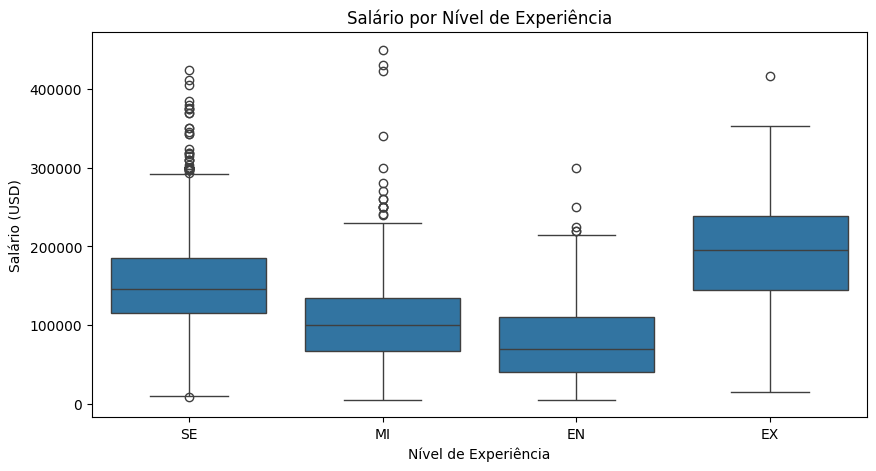

In [40]:
# Criando o gráfico de salário por nível de experiência

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title("Salário por Nível de Experiência")
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário (USD)")
plt.show()


**Realizando a comparação de paises com maior salario**

In [22]:
# Realizando a media salarial por país

df.groupby('employee_residence')['salary_in_usd'].mean()


,salary_in_usd
employee_residence,
AE,100000.000000
AM,50000.000000
AR,35500.000000
AS,32777.500000
AT,71125.833333
...,...
TR,19058.000000
UA,57850.000000
US,152822.011651


In [23]:
# Ordenando os paises que tem a média salarial maior

df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)


,salary_in_usd
employee_residence,
IL,423834.000000
MY,200000.000000
PR,166000.000000
US,152822.011651
CA,132222.905882
...,...
MD,18000.000000
ID,15000.000000
SK,12608.000000


In [24]:
# Pegando uma amostra com apenas os 10 primeiros

df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


,salary_in_usd
employee_residence,
IL,423834.000000
MY,200000.000000
PR,166000.000000
US,152822.011651
CA,132222.905882
CN,125404.000000
NZ,125000.000000
BA,120000.000000
IE,114943.428571


**Calculando Correlações e Tendências**

In [31]:
# Selecionando apenas as colunas númericas para calculo

num_cols = df[['salary_in_usd', 'work_year', 'years_of_experience']]


In [30]:
# Criando matriz de correlação

num_cols.corr()

,salary_in_usd,work_year,years_of_experience
salary_in_usd,1.000000,0.228290,0.410723
work_year,0.228290,1.000000,0.178878
years_of_experience,0.410723,0.178878,1.000000


In [29]:
# Extraindo os resultados

num_cols = df[['salary_in_usd', 'work_year', 'years_of_experience']]
num_cols.corr()


,salary_in_usd,work_year,years_of_experience
salary_in_usd,1.000000,0.228290,0.410723
work_year,0.228290,1.000000,0.178878
years_of_experience,0.410723,0.178878,1.000000
